In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [9]:
features, true_labels = make_blobs(n_samples=200, centers=6, cluster_std=2.75, random_state=42)

In [10]:
true_labels

array([3, 1, 5, 4, 2, 4, 5, 5, 2, 1, 2, 3, 3, 3, 3, 5, 0, 1, 5, 3, 4, 4,
       2, 0, 4, 0, 0, 1, 0, 2, 3, 3, 4, 3, 0, 4, 3, 1, 4, 1, 2, 5, 1, 2,
       3, 4, 4, 5, 5, 5, 5, 1, 4, 0, 5, 1, 0, 0, 1, 3, 1, 4, 3, 1, 4, 5,
       5, 3, 1, 0, 4, 0, 0, 5, 0, 4, 1, 2, 4, 0, 4, 0, 0, 2, 2, 4, 4, 4,
       5, 1, 2, 4, 3, 1, 1, 2, 1, 2, 5, 0, 2, 0, 1, 3, 2, 1, 4, 1, 2, 5,
       3, 3, 0, 2, 3, 0, 5, 1, 5, 4, 0, 0, 0, 4, 3, 1, 5, 5, 2, 2, 0, 3,
       3, 4, 0, 5, 5, 2, 3, 3, 1, 3, 1, 0, 5, 2, 2, 0, 2, 5, 4, 3, 0, 5,
       2, 5, 3, 4, 5, 1, 2, 2, 0, 2, 2, 5, 1, 4, 3, 2, 1, 4, 2, 4, 1, 3,
       4, 1, 3, 1, 0, 1, 3, 0, 3, 5, 4, 4, 1, 2, 2, 2, 0, 0, 3, 5, 5, 0,
       5, 1])

In [11]:
features

array([[-12.13914288,   6.40364452],
       [  4.87925827,   1.15089947],
       [-13.57054205,   5.52767166],
       [  4.29219519,   6.39860305],
       [ -5.44428789,  -6.06340174],
       [  2.79502787,   2.44902788],
       [-11.56403172,   8.81121738],
       [ -8.97205579,   9.43282615],
       [ -7.49414985,  -4.91660823],
       [  8.49756319,  -1.88192074],
       [ -9.56000178,  -4.71562693],
       [ -2.94248151,   9.06680023],
       [ -7.26837885,  10.44632843],
       [ -8.6615577 ,   4.35972478],
       [-11.38738655,   7.15982819],
       [ -9.64060469,   6.64124129],
       [ -1.51469855,   7.2402068 ],
       [  0.21929994,   2.48091279],
       [ -8.70083407,   7.12331195],
       [ -9.53289017,   3.89211917],
       [  2.21425597,   3.10183916],
       [  0.40154715,   6.49785732],
       [-10.15571181,  -5.07458717],
       [ -4.00625012,   9.31932325],
       [ -0.22780664,   9.91551656],
       [  0.32605106,  11.57530646],
       [ -4.16095402,   8.21212832],
 

In [12]:
wcss = []
for i in range(1, 12):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(features) 
        wcss.append(kmeans.inertia_)

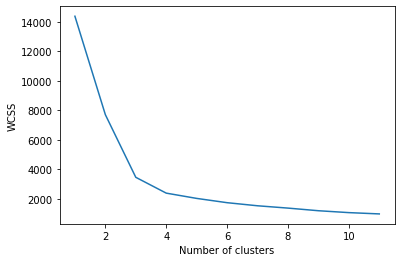

In [13]:
plt.plot(range(1,12), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [14]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10,random_state=0)

In [15]:
y_kmeans = kmeans.fit_predict(features)

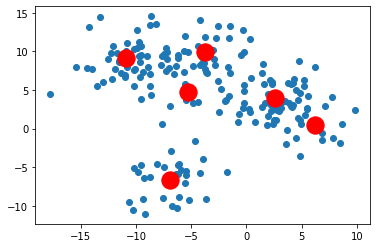

In [16]:
plt.scatter(features[:,0], features[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300,c='red')
plt.show()

In [17]:
import seaborn as sns; sns.set() # for plot styling
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)


1.	Seaborn is a library used for plotting. For classification purposes, digits from the sklearn dataset are used. load_digits will load and return the digits dataset. The data.shape will return the number of samples and number of features(rows and columns). By running the code, we can conclude that there are 1797 rows and 64 columns.

In [20]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

2.	KMeans is a famous unsupervised classification algorithm. Here, n_clusters is the number of clusters to form. Here, 10 clusters and centroids will be created. The loaded digits from the sklearn dataset are fitted and predicted using fit_predict. The cluster_centers_ is the mean of all points belonging to the cluster. In other words, the cluster centers can be extracted via clustering_centers_. By running the above code, we can conclude that kmeans created 10 clusters with 64 features.

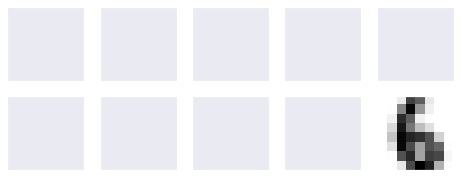

In [21]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [22]:
from scipy.stats import mode
import numpy as np

labels = np.zeros_like(clusters)
for i in range(10):
     mask = (clusters == i)
labels[mask] = mode(digits.target[mask])[0]
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.19755147468002227

3.	The Clusters as zeros stored in labels. In range 10, each digit is compared to original clusters and stored in the mask. Label values are replaced with mode values from digits. Accuracy is 20%. Meaning only one digit is classified that is 6.

Text(89.18, 0.5, 'predicted label')

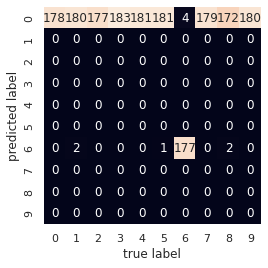

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
 xticklabels=digits.target_names,
 yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

**Activity four**

---


**Exercise 1:** We have three observed points (23, 41), (67, 84), (78, 100).
Question: fit them to a linear model: Y = 𝛽0 + 𝛽1X.
For the ease of computation, we use residual sum of squares (RSS) as the loss function to
estimate the parameters:
Set the learning rate λ = 0.00001, the initial guess for the parameters: 𝛽0 = 7, 𝛽1 = 1.
You only need to provide the first three iterations using Gradient Descent.
Calculate the results manually


In [6]:
x = [23,67,78]
y = [41, 84, 100]
X = np.array(x)
Y = np.array(y)

In [24]:
import numpy as np

class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X, y):
        b = 7
        m = 1
        n = X.shape[0]
        for _ in range(self.iterations):
            b_gradient = -2 * np.sum(y - m*X + b) / n
            m_gradient = -2 * np.sum(X*(y - (m*X + b))) / n
            b = b + (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)
        self.m, self.b = m, b
        
    def predict(self, X):
        return self.m*X + self.b

In [25]:
clf = GradientDescentLinearRegression()
clf.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in multiply
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
